## Importing the Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Data collection and processing

In [18]:
df = pd.read_csv('gld_price_data.csv')

In [19]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [20]:
#checking the number of missing value
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
#number of rows and columns
df.shape

(2290, 6)

In [22]:
#Data type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [23]:
# getting the statistical measure of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation:


1.   Positive Correlation
2.   Negetive Correlation



In [24]:
correlation = df.corr()

In [25]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

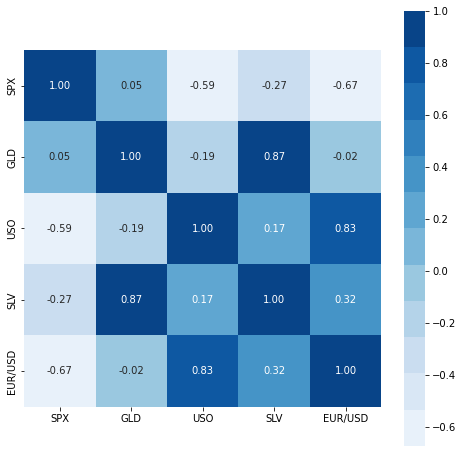

In [33]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, annot=True, fmt='.2f', square=True, cmap=sns.color_palette("Blues",12))


In [34]:
# correlation vlaue of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-35-d7a8b74bf340>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

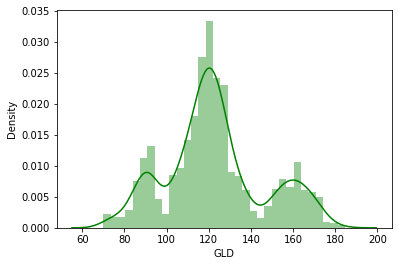

In [35]:
# check the distribution of gold price 
sns.distplot(df['GLD'], color='green')

## Spliting the Feature and the Target

In [36]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [37]:
X = df.drop(['GLD', 'Date'], axis=1)
y = df['GLD']

In [38]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [39]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### spliting into training and test data

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(X_train)

              SPX         USO        SLV   EUR/USD
1018  1413.489990   36.220001  28.920000  1.253447
1870  2085.449951   11.740000  16.420000  1.132824
118   1245.359985  109.250000  18.545000  1.585590
220    805.219971   28.660000  11.090000  1.288494
2053  2328.949951   11.130000  17.530001  1.061639
...           ...         ...        ...       ...
1638  2095.840088   19.660000  15.480000  1.120787
1095  1426.189941   33.369999  29.370001  1.322769
1130  1502.420044   33.430000  27.730000  1.327316
1294  1807.229980   33.189999  18.959999  1.356779
860   1261.010010   38.810001  31.610001  1.341202

[1832 rows x 4 columns]


## Model training Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
regrssor = RandomForestRegressor(n_estimators=100)

In [53]:
regrssor.fit(X_train,y_train)

RandomForestRegressor()

## Model Evalution

In [54]:
# Prediction on Test Data
y_hat = regrssor.predict(X_test)

In [55]:
print(y_hat)

[122.49679955 130.39190287 127.7120001   96.63939738 119.04880053
 114.39349911 124.80430113 117.77539939 108.06560085  98.21229922
  95.5216992  167.22849856 149.73370101 116.07270064 170.94450045
  84.96109993 123.25679862 109.04909695 113.15280068 131.47070338
 124.29709904 113.57530075 115.83270049 108.77519985 108.66900148
 125.80949906 119.15169979 112.19819944 113.36720168 125.46259901
 145.97330161  89.61600049 168.28300005 113.82049915 108.54250068
 119.91810125 141.22899829 161.1994006  173.84059791 153.13410134
 119.15030106 113.42030035 121.42339932 113.70899935 122.03159974
 107.81850064  88.50659882 114.15039924 130.01520282 118.08600101
 104.69949971 130.06180264 107.18949829 160.80150335 131.57850054
 118.09339994 147.4099     137.86530137  95.59950114 124.54550123
 114.48739918  86.1790007  104.32109949 113.91180073  84.21709931
 122.32920014 116.53489902 113.41210191 165.30840312  92.19720042
  80.50550069 160.95900047 158.55500179 106.69259999 148.50830072
 109.81989

In [56]:
# R Squred error
from sklearn.metrics import r2_score
error_score = r2_score(y_test,y_hat)
print(f'The R squared error is {error_score}')

The R squared error is 0.9895630147459322


## Compare the actual values and predicted values in a plot

In [57]:
y_test = list(y_test)
print(y_test)

[122.32, 129.899994, 126.980003, 96.5, 117.580002, 115.0, 125.440002, 116.93, 108.220001, 98.830002, 96.910004, 168.789993, 151.029999, 115.839996, 169.809998, 85.129997, 122.639999, 107.849998, 110.449997, 131.240005, 124.940002, 115.379997, 116.650002, 109.25, 110.529999, 125.720001, 123.709999, 114.949997, 114.290001, 126.860001, 146.869995, 89.440002, 167.270004, 115.050003, 117.110001, 120.620003, 141.630005, 160.649994, 173.309998, 152.300003, 117.459999, 113.150002, 121.309998, 113.470001, 121.349998, 107.519997, 88.839996, 114.440002, 130.559998, 117.739998, 99.669998, 129.770004, 106.169998, 161.070007, 127.93, 115.940002, 143.470001, 130.110001, 95.730003, 124.360001, 116.620003, 85.599998, 104.099998, 112.610001, 86.519997, 122.400002, 116.470001, 112.660004, 166.399994, 91.989998, 80.809998, 160.559998, 157.639999, 103.419998, 135.020004, 110.400002, 124.43, 127.739998, 112.440002, 119.910004, 137.809998, 105.720001, 93.559998, 92.730003, 111.510002, 119.580002, 109.980003,

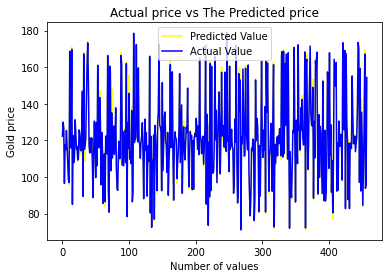

In [59]:
plt.plot(y_hat, color='yellow', label='Predicted Value')
plt.plot(y_test, color='blue', label='Actual Value')
plt.title('Actual price vs The Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()